In [1]:
from sklearn.cluster import KMeans 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


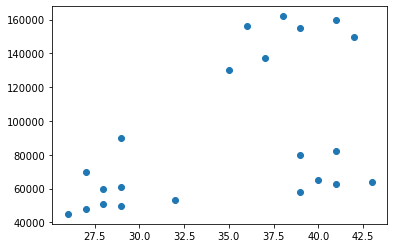

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
k=KMeans(n_clusters=4)

In [7]:
k

KMeans(n_clusters=4)

In [9]:
k_predicted=k.fit_predict(df[['Age','Income($)']])

In [10]:
k_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [12]:
df['cluster']=k_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


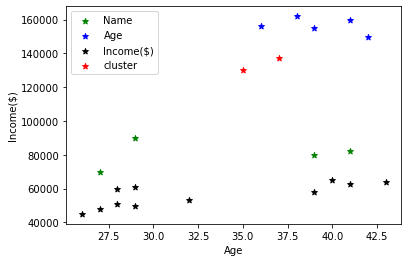

In [22]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]



plt.scatter(df1.Age,df1['Income($)'],color='green',marker='*')
plt.scatter(df2.Age,df2['Income($)'],color='blue',marker='*')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='*')
plt.scatter(df4.Age,df4['Income($)'],color='red',marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(df)

In [29]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster,income($)
0,Rob,0.058824,0.213675,0,0.213675
1,Michael,0.176471,0.384615,0,0.384615
2,Mohan,0.176471,0.136752,2,0.136752
3,Ismail,0.117647,0.128205,2,0.128205
4,Kory,0.941176,0.897436,1,0.897436
5,Gautam,0.764706,0.940171,1,0.940171
6,David,0.882353,0.982906,1,0.982906
7,Andrea,0.705882,1.000000,1,1.000000
8,Brad,0.588235,0.948718,1,0.948718
9,Angelina,0.529412,0.726496,3,0.726496


In [33]:
k=KMeans(n_clusters=4)
k_prediced=k.fit_predict(df[['Age','Income($)']])
k_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [36]:
df['cluster']=k_predicted
df.drop('income($)',axis='columns',inplace=True)
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [38]:
k.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.82352941, 0.95512821],
       [0.58823529, 0.82051282]])

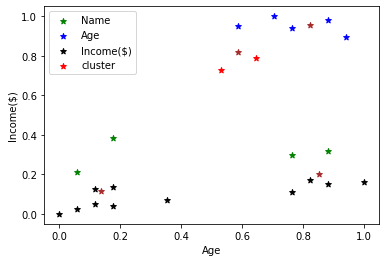

In [40]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]



plt.scatter(df1.Age,df1['Income($)'],color='green',marker='*')
plt.scatter(df2.Age,df2['Income($)'],color='blue',marker='*')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='*')
plt.scatter(df4.Age,df4['Income($)'],color='red',marker='*')

plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='brown',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(df)

In [53]:

sse = []
for k in range(1,10):
    k = KMeans(n_clusters=k)
    k.fit(df[['Age','Income($)']])
    sse.append(k.inertia_)

In [54]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.21733935105456412,
 0.16858512236029757,
 0.13762504146528043,
 0.10740235405674733]

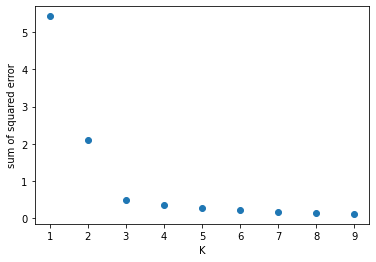

In [55]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.scatter(k_rng,sse)